In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [2]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

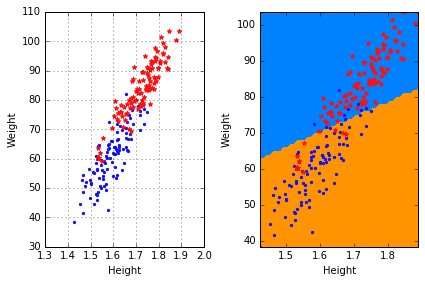

In [3]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = least_squares(y, tx)[0]
    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

In [4]:
def sigmoid(t):
    """apply sigmoid function on t."""
    return np.exp(t)/(1+np.exp(t))

In [5]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    N = tx.shape[0]
    error = 0
    expo = np.exp(tx.dot(w))
    ln = np.log(np.ones((N,1)) + expo)
#     print(y.shape, tx.shape, w.shape )
    term2 = y*(tx.dot(w))
    whole_term = ln - term2
#     print(whole_term.shape)
    error = np.ones((1,N)).dot(whole_term)
    
#     for i in range(0,N):
#         sig = sigmoid(tx[i].dot(w))
#         error = error - y[i]*np.log(sig) + (1-y[i])*np.log(1-sig)
#     print(whole_term)
    return error

In [6]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    sig = sigmoid(tx.dot(w))
    return np.transpose(tx).dot(sig-y)

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [7]:
def learning_by_gradient_descent(y, tx, w, alpha):
    """
    Do one step of gradient descen using logistic regression.
    Return the loss and the updated w.
    """
#     max_iters = 100
#     ws = [initial_w]
#     w = initial_w
#     for n_iter in range(max_iters):
    loss = calculate_loss(y, tx, w)
    loss = np.squeeze(loss)
    grad = calculate_gradient(y, tx, w)
    w = w - alpha * grad
    # print(w, w.shape)
    return loss, w

Demo!

Current iteration=0, the loss=138.62943611198907
Current iteration=1000, the loss=43.49258275203995
Current iteration=2000, the loss=41.55453651737652
Current iteration=3000, the loss=41.10170781312696
Current iteration=4000, the loss=40.96605044352832
Current iteration=5000, the loss=40.92056155503628
Current iteration=6000, the loss=40.904380183565806
Current iteration=7000, the loss=40.89842938170658
Current iteration=8000, the loss=40.89619782090304
Current iteration=9000, the loss=40.89535112699075
The loss=[[ 40.89502758]]


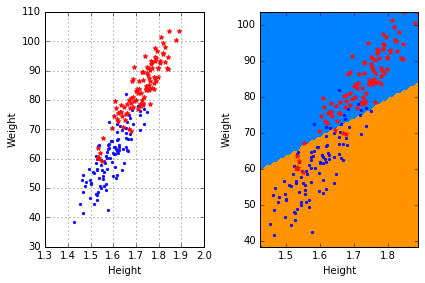

In [14]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    alpha = 0.001
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, alpha)
        # log info
        if iter % 1000 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))
    
#     Comment this!
#     return y, tx, w

# y, tx, w = logistic_regression_gradient_descent_demo(y, x)

# logistic_regression_gradient_descent_demo(y, x)

Calculate your hessian below

In [28]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate hessian: TODO
    # ***************************************************
    N = tx.shape[0]
    S = sigmoid(tx.dot(w)).dot(np.transpose(np.ones((N,1)) - sigmoid(tx.dot(w))))
#     print(S.shape)
    Hess = np.transpose(tx).dot(S.dot(tx))
    return Hess

hess = calculate_hessian(y, tx, w)
print(np.linalg.inv(hess).dot(hess))

[[ 1.125    0.0625   0.03125]
 [-0.25     0.875   -0.125  ]
 [ 0.       0.       1.     ]]


Write a function below to return loss, gradient, and hessian.

In [36]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    alpha = 0.001
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, alpha)
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    
    grad = calculate_gradient(y, tx, w)
    hess = calculate_hessian(y, tx, w)
    
    return loss, grad, hess


# print(logistic_regression(y, tx, w))

### Using Newton method
Use Newton method for logistic regression.

In [39]:
def learning_by_newton_method(y, tx, w, alpha):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    #****************************************************
    # return loss, gradient and hessian: TODO
    # ***************************************************
    loss, grad, hess = logistic_regression(y, tx, w)
    # ***************************************************
    # update w: TODO
    # ***************************************************
    hess_inv = np.linalg.inv(hess)
    w = w - alpha*(hess_inv.dot(grad))
    return loss, w

demo

Current iteration=0, the loss=40.89502777288099


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: overflow encountered in exp


The loss=[[ inf]]


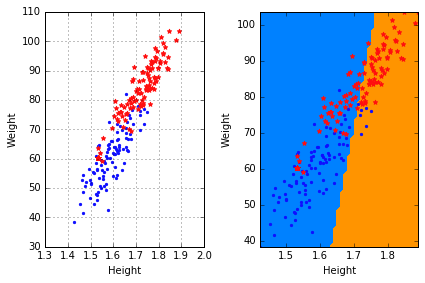

In [40]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 10000
    alpha = 0.01
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, alpha)
        # log info
        if iter % 500 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [ ]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and hessian: TODO
    # ***************************************************
    raise NotImplementedError

In [ ]:
def learning_by_penalized_gradient(y, tx, w, alpha, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient and hessian: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    raise NotImplementedError
    return loss, w

In [ ]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    alpha = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, alpha, lambda_)
        # log info
        if iter % 500 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)